In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans

## Ceking Dataset

In [52]:
df = pd.read_csv('../Dataset/StudentMentalHealth.csv')

In [53]:
df.info()
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB
     Name  Gender  Age Education Level  Screen Time (hrs/day)  \
0   Aarav    Male   15         Class 8                    

In [54]:
print('Missing value')
print(df.isnull().sum())

print('duplikasi data')
print(df.duplicated().sum())

Missing value
Name                            0
Gender                          0
Age                             0
Education Level                 0
Screen Time (hrs/day)           0
Sleep Duration (hrs)            0
Physical Activity (hrs/week)    0
Stress Level                    0
Anxious Before Exams            0
Academic Performance Change     0
dtype: int64
duplikasi data
0


In [55]:
# >>> Mapping stress level <<<
stress_order = ['Low', 'Medium', 'High']
df['Stress Level'] = pd.Categorical(df['Stress Level'], categories=stress_order, ordered=True)

df['Anxious Before Exams Binary'] = df['Anxious Before Exams'].map({'Yes': 1, 'No': 0})

In [56]:
# Membuat kategori untuk 'Physical Activity (hrs/week)'
# Kita bisa menentukan batas sendiri berdasarkan distribusi data atau pengetahuan domain
# Contoh: 0-2 jam/minggu (Rendah), 2-4 jam/minggu (Sedang), >5 jam/minggu (Tinggi)
bins = [0, 2, 4, df['Physical Activity (hrs/week)'].max() + 1] # +1 untuk memastikan nilai max masuk
labels = ['Low', 'Medium', 'High']
df['Physical Activity Category'] = pd.cut(df['Physical Activity (hrs/week)'], bins=bins, labels=labels, right=False)

# Memastikan urutan kategori aktivitas fisik
physical_activity_order = ['Low', 'Medium', 'High']
df['Physical Activity Category'] = pd.Categorical(df['Physical Activity Category'], categories=physical_activity_order, ordered=True)

print("\nDistribusi Aktivitas Fisik yang Sudah Dikategorikan:")
print(df['Physical Activity Category'].value_counts())


Distribusi Aktivitas Fisik yang Sudah Dikategorikan:
Physical Activity Category
High      593
Medium    219
Low       188
Name: count, dtype: int64


In [57]:
# Membuat kategori untuk 'Screen Time (hrs/day)'
# Kita bisa menentukan batas sendiri berdasarkan distribusi data atau pengetahuan domain
# Contoh: 0-4.5 jam/hari (Rendah), 4.6-8.5 jam/hari (Sedang), >8.5 jam/hari (Tinggi)
bins = [0, 4.5, 8.5, df['Screen Time (hrs/day)'].max() + 1] # +1 untuk memastikan nilai max masuk
labels = ['Low', 'Medium', 'High']
df['Screen Time Category'] = pd.cut(df['Screen Time (hrs/day)'], bins=bins, labels=labels, right=False)

# Memastikan urutan kategori 
screen_time_order = ['Low', 'Medium', 'High']
df['Screen Time Category'] = pd.Categorical(df['Screen Time Category'], categories=physical_activity_order, ordered=True)

print("\nDistribusi Aktivitas Fisik yang Sudah Dikategorikan:")
print(df['Screen Time Category'].value_counts())


Distribusi Aktivitas Fisik yang Sudah Dikategorikan:
Screen Time Category
Medium    415
High      334
Low       251
Name: count, dtype: int64


In [58]:

print("\nDataset setelah pra-pemrosesan:")
df.head(10)


Dataset setelah pra-pemrosesan:


,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change,Anxious Before Exams Binary,Physical Activity Category,Screen Time Category
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same,0,High,Medium
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same,0,Low,Low
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same,0,High,High
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same,1,High,High
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same,1,Medium,Low
5,Aditya,Male,23,MSc,8.6,8.4,0.1,Low,No,Improved,0,Low,High
6,Vivaan,Male,22,MTech,3.6,6.6,0.5,Medium,Yes,Improved,1,Low,Low
7,Arjun,Male,25,MTech,7.0,4.7,4.5,Medium,No,Same,0,High,Medium
8,Sai,Male,20,BA,4.8,5.0,7.9,Medium,No,Improved,0,High,Medium
9,Aadhya,Female,16,Class 9,8.9,8.4,7.8,Low,Yes,Improved,1,High,High


## EDA (Eksploratory Data Analicys)

In [59]:
df.describe(include='all')

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change,Anxious Before Exams Binary,Physical Activity Category,Screen Time Category
count,1000,1000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000,1000
unique,30,3,NaN,11,NaN,NaN,NaN,3,2,3,NaN,3,3
top,Shaurya,Male,NaN,MTech,NaN,NaN,NaN,Medium,Yes,Same,NaN,High,Medium
freq,59,475,NaN,143,NaN,NaN,NaN,492,513,399,NaN,593,415
mean,NaN,NaN,20.342000,NaN,6.909200,6.450800,5.017600,NaN,NaN,NaN,0.513000,NaN,NaN
std,NaN,NaN,3.459914,NaN,2.907106,1.466407,2.930344,NaN,NaN,NaN,0.500081,NaN,NaN
min,NaN,NaN,15.000000,NaN,2.000000,4.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,17.000000,NaN,4.400000,5.100000,2.600000,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,20.000000,NaN,6.900000,6.500000,5.000000,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,23.000000,NaN,9.500000,7.700000,7.600000,NaN,NaN,NaN,1.000000,NaN,NaN


## Visualisasi EDA

## 1. Profil Umum Kesehatan Mental Siswa Berdasarkan Demografi
### Tujuan: Memahami bagaimana distribusi tingkat stres, durasi tidur, dan kecemasan sebelum ujian di kalangan siswa secara - keseluruhan, dan apakah ada pola yang berbeda berdasarkan jenis kelamin atau jenjang pendidikan.

Pertanyaan Kunci:

- Bagaimana proporsi siswa di setiap kategori tingkat stres (Low, Medium, High)?
- Apakah ada perbedaan signifikan dalam tingkat stres, durasi tidur atau kecemasan sebelum ujian di berbagai jenjang pendidikan?
- Apakah ada variasi dalam indikator kesehatan mental ini di berbagai jenjang pendidikan?

#### Distribusi Keseluruhan Tingkat Stres

#### 📊 Histogram Bar

---

##### **Temuan Utama:**

Berdasarkan grafik histogram, dapat disimpulkan bahwa:

- Mayoritas siswa berada pada tingkat **stres sedang**, dengan persentase sekitar **49%**.
- Tingkat **stres rendah** menempati urutan kedua dengan persentase **32,7%**.
- Sementara itu, sekitar **18%** siswa mengalami **stres tinggi**.

---

##### **Implikasi:**

- Data ini menunjukkan bahwa hampir **setengah dari siswa yang terdata mengalami stres sedang**, yang menandakan adanya tekanan psikologis yang cukup signifikan, meskipun belum mencapai kategori berat.
- Sekitar **32,7% siswa berada pada tingkat stres rendah**, yang dapat diinterpretasikan sebagai kelompok dengan **kesehatan mental yang relatif stabil dan dalam kondisi aman**.
- Meskipun jumlahnya lebih kecil, **sekitar 181 siswa atau 18% dari total** mengalami **tingkat stres tinggi**, yang mengindikasikan perlunya **perhatian dan intervensi lebih lanjut** untuk kelompok ini agar tidak berkembang menjadi gangguan mental yang lebih serius.

---

> 📌 **Kesimpulan**: Meskipun sebagian besar siswa berada pada tingkat stres yang moderat hingga rendah, keberadaan siswa dengan stres tinggi tetap menjadi perhatian utama dalam upaya menjaga kesejahteraan mental secara menyeluruh.


In [68]:
# Menggunakan Plotly Express
fig_stress_dist = px.bar(
    df['Stress Level'].value_counts(normalize=True).reset_index(),
    x='Stress Level',
    y='proportion',
    title='Distribusi Tingkat Stres Siswa',
    labels={'proportion': 'Proporsi Siswa', 'Stress Level': 'Tingkat Stres'},
    text_auto='.1%', # Menampilkan persentase pada bar
    color='Stress Level', # Memberi warna berdasarkan tingkat stres
    category_orders={'Stress Level': stress_order} # Memastikan urutan kategori
)
fig_stress_dist.update_layout(xaxis={'categoryorder':'array', 'categoryarray':stress_order})
fig_stress_dist.show()

#### Distribusi Tingkat Stres di Setiap Jenjang Pendidikan

#### 📊 Box Plot (Pengelompokan Berdasarkan Jenjang Pendidikan)

---

##### **Temuan Utama:**

Berdasarkan grafik box plot, terlihat bahwa:

- **Jenjang Magister (S2)** menunjukkan tingkat stres **sedang** yang cukup tinggi, yaitu antara **45–60%**. Namun, variasi tingkat stres ini juga bergantung pada **program studi** yang diambil:
  - Beberapa program studi menunjukkan tingkat stres **rendah** sekitar **40–45%**.
  - Tingkat stres **tinggi** pada jenjang ini relatif rendah, berada di kisaran **15–25%**.

- **Siswa Kelas 9–11** memiliki rata-rata tingkat stres **sedang** yang lebih tinggi dibandingkan dengan siswa jenjang **Bachelor (S1)**.

- Meskipun demikian, rata-rata tingkat **stres tinggi** lebih banyak dialami oleh siswa jenjang **S1** dibandingkan siswa Kelas 9–11.

- **Siswa Kelas 8 dan 12** menunjukkan rata-rata tingkat stres (rendah, sedang, dan tinggi) yang **cenderung paling rendah** di antara semua jenjang pendidikan.

---

##### **Implikasi:**

- Data ini menunjukkan bahwa **jenjang pendidikan memiliki pengaruh terhadap tingkat stres siswa**, namun faktor **jurusan atau program studi** juga berperan penting.

- Contohnya:
  - Di jenjang **Magister (S2)**:
    - Siswa **MTech** memiliki tingkat stres **sedang** yang lebih tinggi dibandingkan **MA** dan **MSc**.
    - Namun, siswa **MA** dan **MSc** justru memiliki tingkat stres **tinggi** yang lebih besar dibandingkan **MTech**.

  - Di jenjang **Bachelor (S1)**:
    - Siswa **BSc** memiliki tingkat stres **sedang** yang lebih tinggi dibandingkan **BTech** dan **BA**.
    - Sebaliknya, tingkat stres **tinggi** lebih banyak dialami oleh siswa **BTech** dan **BA** dibandingkan **BSc**.

---

> 🎓 **Kesimpulan**: Tingkat stres siswa tidak hanya dipengaruhi oleh jenjang pendidikan, tetapi juga sangat bergantung pada **jurusan atau program studi yang diambil**. Pemahaman ini penting untuk mengembangkan pendekatan manajemen stres yang lebih spesifik dan relevan dengan kebutuhan siswa.


In [69]:
# Menggunakan Plotly Express
fig_edu_stress = px.histogram(
    df,
    x='Education Level',
    color='Stress Level',
    title='Distribusi Tingkat Stres Berdasarkan Jenjang Pendidikan',
    labels={'Education Level': 'Jenjang Pendidikan', 'Stress Level': 'Tingkat Stres'},
    barmode='group',
    category_orders={'Stress Level': stress_order},
    height=500
)
fig_edu_stress.show()

#### Durasi Tidur Berdasarkan Tingkat Stres

#### 📊 Box Plot

---

##### **Temuan Utama:**

Berdasarkan visualisasi **box plot**, terlihat bahwa **tingkat stres berpengaruh terhadap durasi jam tidur siswa**. Rata-rata Durasi tidur pada setiap kategori tingkat stres dapat dijelaskan sebagai berikut:

- **Stres Rendah:**
  - Q1 : 5,1 jam
  - Q2 : 6,6 jam
  - Q3 : 7,8 jam

- **Stres Sedang:**
  - Q1: 5,2 jam
  - Q2: 6,4 jam
  - Q3: 7,6 jam

- **Stres Tinggi:**
  - Q1: 5,15 jam
  - Q2: 6,5 jam
  - Q3: 7,7 jam

---

##### **Implikasi:**

- Data menunjukkan bahwa **tingkat stres memengaruhi pola tidur siswa**.
- **Siswa dengan tingkat stres rendah** cenderung tidur lebih lama — sekitar **10% lebih banyak** dibandingkan dengan siswa yang mengalami stres tinggi.
- Menariknya, **siswa dengan tingkat stres sedang justru memiliki durasi tidur yang lebih pendek** dibandingkan baik kelompok stres rendah maupun stres tinggi.
- Hal ini bisa mengindikasikan bahwa pada tingkat stres sedang, siswa mungkin mengalami **gangguan tidur yang tidak stabil**, seperti sulit tidur meskipun tidak dalam tekanan ekstrem.

---

> 💡 **Kesimpulan**: Terdapat hubungan yang signifikan antara tingkat stres dan durasi tidur. Upaya peningkatan manajemen stres dapat berdampak positif terhadap kualitas tidur siswa.


In [70]:
# Menggunakan Plotly Express (Box Plot untuk distribusi)
fig_gender_sleep = px.box(
    df,
    x='Stress Level',
    y='Sleep Duration (hrs)',
    title='Durasi Tidur Berdasarkan Tingkat stress',
    labels={'Stress Level': 'Tingkat stress', 'Sleep Duration (hrs)': 'Durasi Tidur (Jam)'},
    color='Stress Level'
)
fig_gender_sleep.show()

### Analisis Tingkat Kecemasan Siswa Sebelum Ujian Berdasarkan Jenjang Pendidikan

#### Visualisasi: Box Plot Kecemasan Siswa per Jenjang Pendidikan

---

#### Temuan Utama:

Berdasarkan **Box Plot** kecemasan siswa sebelum ujian yang dikelompokkan berdasarkan jenjang pendidikan, beberapa poin penting terlihat:

#### 📌 Jenjang Bachelor (S1)
- Mayoritas siswa pada jenjang **S1** menunjukkan **tingkat kecemasan yang paling tinggi** sebelum ujian.
- Rata-rata persentase siswa yang menyatakan _"Ya, cemas"_ berada di angka **58%**.
- Sebaran data lebih terkonsentrasi pada nilai-nilai tinggi.

#### 📌 Jenjang Kelas 8-12
- Siswa di jenjang ini menunjukkan **variasi tingkat kecemasan yang lebih seimbang**.
- Proporsi yang menjawab _"Ya, cemas"_ berkisar antara **46–50%**.
- Yang menjawab _"Tidak cemas"_ sedikit lebih tinggi, yaitu **51–54%**.
- Hal ini mengindikasikan adanya **keseimbangan antara siswa yang merasa cemas dan tidak cemas**.

#### 📌 Jenjang Magister (S2)
- Tingkat kecemasan pada jenjang **S2** terlihat lebih **bervariasi**.
- Kemungkinan besar dipengaruhi oleh faktor-faktor lain seperti **jurusan atau pengalaman individu**.

---

#### Implikasi:

- Data ini dengan jelas menunjukkan adanya **hubungan antara jenjang pendidikan dan tingkat kecemasan siswa** sebelum ujian.

- **Jenjang S1** menonjol sebagai kelompok dengan tingkat kecemasan tertinggi (**56–60%** menjawab "Ya, cemas").  
  Hal ini mungkin disebabkan oleh:
  - Tekanan akademik yang lebih intens.
  - Ketergantungan kuat pada hasil ujian untuk kelulusan atau karier.

- **Kelas 11** menunjukkan **keseimbangan antara kecemasan dan ketenangan**, menjadikannya titik fokus yang baik untuk intervensi jika diperlukan.

- **Kelas 8** memiliki tingkat kecemasan terendah, dengan **54% menyatakan "Tidak cemas"**.  
  Ini bisa jadi karena:
  - Mereka belum terlalu terbebani ekspektasi atau dampak besar dari hasil ujian.

- **Mahasiswa Magister (S2)** cenderung memiliki **strategi manajemen stres yang lebih baik**, sehingga tingkat kecemasan lebih tergantung pada faktor lain seperti dinamika jurusan.

---

> 📊 **Kesimpulan**: Visualisasi Box Plot mengungkap bahwa **semakin tinggi jenjang pendidikan, kecemasan cenderung meningkat**, dengan beberapa pengecualian berdasarkan pengalaman dan kondisi pribadi siswa.


In [71]:
# Menggunakan Plotly Express
fig_edu_anxious = px.bar(
    df.groupby('Education Level')['Anxious Before Exams'].value_counts(normalize=True).unstack().fillna(0).reset_index(),
    x='Education Level',
    y=['Yes', 'No'], # Jika 'Yes' dan 'No' adalah kolom setelah unstack
    title='Proporsi Siswa Cemas Sebelum Ujian Berdasarkan Jenjang Pendidikan',
    labels={'value': 'Proporsi', 'variable': 'Cemas Sebelum Ujian'},
    barmode='group',
    height=500
)
fig_edu_anxious.update_layout(yaxis_tickformat='.0%') # Format y-axis sebagai persentase
fig_edu_anxious.show()

## 2. Dampak Kebiasaan Harian terhadap Kesehatan Mental
### Tujuan: Menjelajahi hubungan antara kebiasaan gaya hidup siswa (waktu layar, durasi tidur, aktivitas fisik) dengan tingkat stres dan kecemasan mereka.

Pertanyaan Kunci:

- Bagaimana waktu layar (Screen Time) yang tinggi berkaitan dengan tingkat stres? Apakah siswa dengan waktu layar lebih tinggi cenderung memiliki tingkat stres yang lebih tinggi?
- Apakah durasi tidur (Sleep Duration) yang lebih panjang berhubungan dengan tingkat stres yang lebih rendah atau kurangnya kecemasan sebelum ujian?
- Apakah aktivitas fisik (Physical Activity) yang lebih banyak berkorelasi dengan tingkat stres yang lebih rendah atau performa akademik yang lebih stabil?

#### Tingkat Stres Siswa Berdasarkan Aktivitas Penggunaan Gadget

**Kategori Penggunaan Gadget:**
- **0 - 4,5 jam** → *Low* (Rendah)
- **4,6 - 8,5 jam** → *Medium* (Sedang)
- **> 8,5 jam** → *High* (Tinggi)
---
##### **Temuan Utama:**
- **Tingkat stres rendah** paling banyak ditemukan pada siswa yang menggunakan gadget dalam rentang waktu *sedang* (42,8%), diikuti oleh rentang *tinggi* (32,7%).
- **Tingkat stres sedang** juga didominasi oleh penggunaan gadget dalam rentang *sedang* (42,2%), dan *tinggi* (32,5%).
- **Tingkat stres tinggi** menunjukkan distribusi yang sedikit berbeda: 37% menggunakan gadget dalam durasi *sedang* maupun *tinggi*, sedangkan 26% berada pada kategori *rendah*.
---
##### **Implikasi:**
Data menunjukkan adanya **keterkaitan antara tingkat stres siswa dan durasi penggunaan gadget**. Beberapa poin penting:
- Siswa dengan **tingkat stres tinggi cenderung memiliki penggunaan gadget yang lebih rendah** dibandingkan siswa dengan stres sedang atau rendah. Misalnya, hanya **37%** dari siswa dengan stres tinggi berada pada kategori *penggunaan sedang*, lebih rendah dibandingkan dengan **42,2%** (stres sedang) dan **42,8%** (stres rendah).
- Namun, siswa dengan **tingkat stres tinggi juga menunjukkan proporsi penggunaan gadget dalam durasi panjang (tinggi) sebesar 37%**, yang **lebih tinggi 4%** dibandingkan siswa dengan stres rendah maupun sedang.
- Dari sisi sebaliknya, **penggunaan gadget juga berpotensi memengaruhi tingkat stres**. Siswa dengan **penggunaan gadget rendah** cenderung memiliki tingkat stres yang lebih rendah. Contohnya, **24,5% siswa dengan stres rendah** berada pada kategori penggunaan gadget rendah, hanya sedikit di bawah **26% siswa dengan stres tinggi**.
---
> 📌 **Kesimpulan**: Walaupun tidak ada hubungan kausal yang eksplisit, terdapat pola yang menunjukkan bahwa baik **tingkat stres memengaruhi durasi penggunaan gadget**, maupun **durasi penggunaan gadget berpotensi memengaruhi tingkat stres**. Perlu kajian lebih lanjut untuk memahami arah dan kekuatan hubungan ini secara mendalam.
---
> 📌 **Catatan**: Jika anda mengganti mapping kategori penggunaan gadget, kesimpulan dan penjelasan yang saya berikan dapat berubah/kurang sesuai **PERHATIKAN MAPPING KATEGORI**



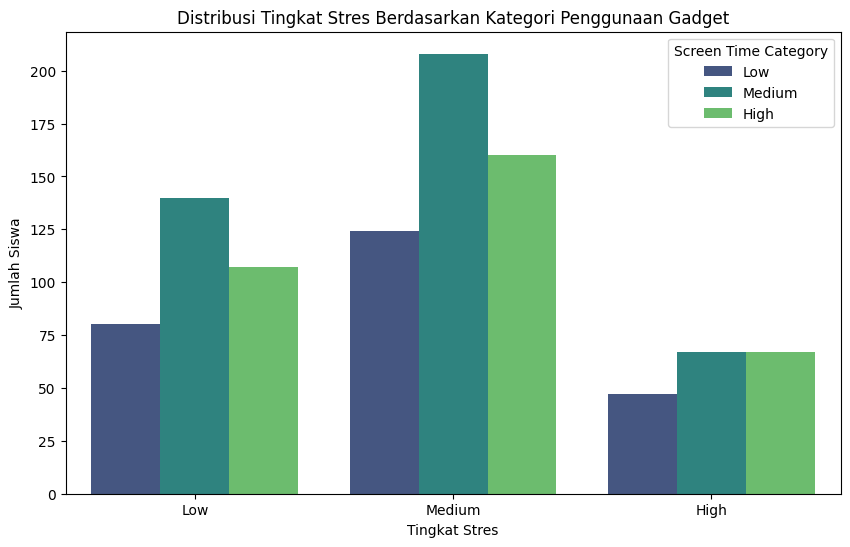

In [64]:
# Menggunakan Plotly Express (Bar Chart)
fig_screenTime_stress_cat = px.histogram(
    df,
    x='Stress Level',
    color='Screen Time Category', # Menggunakan kolom kategori
    title='Distribusi Tingkat Stres Berdasarkan Kategori Penggunaan Gadget',
    labels={
        'Stress Level': 'Tingkat Stres',
        'Screen Time Category': 'Kategori Penggunaan Gadget'
    },
    barmode='group',
    category_orders={'Stress Level': stress_order, 'Screen Time Category': screen_time_order},
    height=500
)
fig_screenTime_stress_cat.show()

# Menggunakan Seaborn (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress Level', hue='Screen Time Category',
                order=stress_order, palette='viridis',
                hue_order=screen_time_order) # Pastikan urutan hue juga
plt.title('Distribusi Tingkat Stres Berdasarkan Kategori Penggunaan Gadget')
plt.xlabel('Tingkat Stres')
plt.ylabel('Jumlah Siswa')
plt.show()

#### Tingkat Stres Siswa Berdasarkan Aktivitas Fisik yang Dilakukan

**Kategori Durasi Aktivitas Fisik per Hari:**
- **0 - 2 jam** → *Low* (Rendah)
- **2 - 4 jam** → *Medium* (Sedang)
- **> 4 jam** → *High* (Tinggi)

---

##### **Temuan Utama:**

- **Siswa dengan tingkat stres rendah** paling banyak melakukan aktivitas fisik dengan intensitas *tinggi* (57,1%), diikuti oleh *sedang* (21%), dan *rendah* (20,9%).
- **Siswa dengan tingkat stres sedang** tercatat 59,1% berada pada kategori aktivitas *tinggi*, 23,1% *sedang*, dan 17,8% *rendah*.
- **Siswa dengan tingkat stres tinggi** justru memiliki proporsi aktivitas fisik *tinggi* yang lebih besar lagi yaitu 64%, diikuti oleh *sedang* (18,7%) dan *rendah* (17,3%).

---

##### **Implikasi:**

Data ini menunjukkan bahwa **aktivitas fisik memang berkaitan dengan tingkat stres**, tetapi hubungan tersebut **tidak selalu linier**. Beberapa poin penting yang bisa disimpulkan:

- **Aktivitas fisik yang tinggi tidak selalu identik dengan tingkat stres yang rendah.** Misalnya, siswa dengan stres tinggi justru memiliki proporsi aktivitas fisik tinggi sebesar **64%**, lebih tinggi dibandingkan siswa dengan stres rendah (**57,1%**).
- **Siswa dengan stres rendah memiliki distribusi aktivitas fisik yang lebih seimbang**, terutama pada kategori aktivitas sedang (**21%**), dibandingkan dengan siswa yang mengalami stres tinggi (**17,3%**). Ini mengindikasikan bahwa **aktivitas fisik dengan intensitas sedang mungkin lebih efektif dalam menjaga keseimbangan mental**.
- Aktivitas fisik **berlebihan** (terlalu tinggi) juga bisa menjadi beban tambahan dan justru meningkatkan stres, tergantung pada konteks dan kemampuan fisik siswa.

---

> 📌 **Kesimpulan**: Aktivitas fisik berperan penting dalam pengelolaan stres, namun **intensitas yang terlalu tinggi belum tentu optimal**. Justru, aktivitas dengan intensitas sedang dapat menjadi solusi yang lebih ideal untuk menjaga keseimbangan fisik dan mental siswa.
---
> 📌 **Catatan**: Jika anda mengganti mapping kategori penggunaan gadget, kesimpulan dan penjelasan yang saya berikan dapat berubah/kurang sesuai **PERHATIKAN MAPPING KATEGORI**


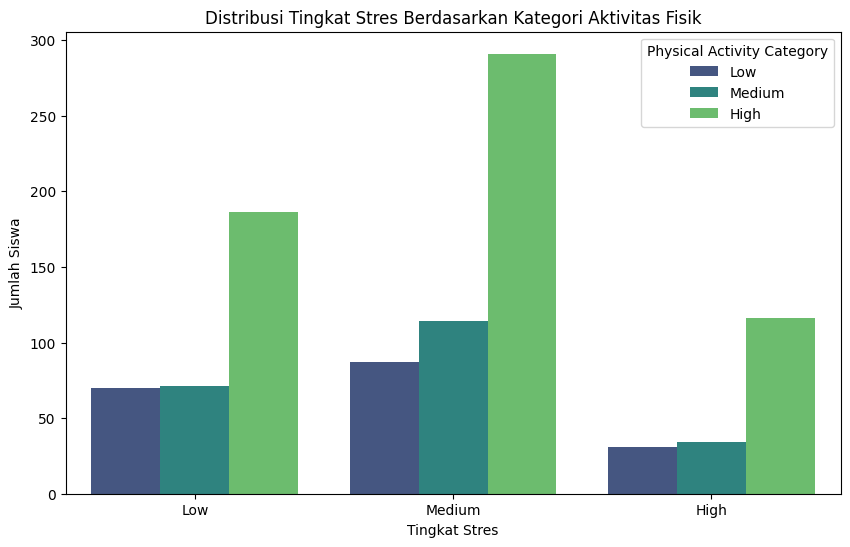

In [65]:
# Menggunakan Plotly Express (Bar Chart)
fig_physic_stress_cat = px.histogram(
    df,
    x='Stress Level',
    color='Physical Activity Category', # Menggunakan kolom kategori
    title='Distribusi Tingkat Stres Berdasarkan Kategori Aktivitas Fisik',
    labels={
        'Stress Level': 'Tingkat Stres',
        'Physical Activity Category': 'Kategori Aktivitas Fisik'
    },
    barmode='group',
    category_orders={'Stress Level': stress_order, 'Physical Activity Category': physical_activity_order},
    height=500
)
fig_physic_stress_cat.show()

# Menggunakan Seaborn (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress Level', hue='Physical Activity Category',
                order=stress_order, palette='viridis',
                hue_order=physical_activity_order) # Pastikan urutan hue juga
plt.title('Distribusi Tingkat Stres Berdasarkan Kategori Aktivitas Fisik')
plt.xlabel('Tingkat Stres')
plt.ylabel('Jumlah Siswa')
plt.show()

#### Hubungan antara durasi tidur berdasarkan jenis kelamin dan tingkat stress berdasarkan durasi tidur

#### 📊 Box Plot & Bar-group Plot

---

##### **Temuan Utama:**

Berdasarkan visualisasi **box plot**, terlihat bahwa **tingkat stres berpengaruh terhadap durasi jam tidur siswa**. Rata-rata jam tidur pada masing-masing gender dapat dijelaskan sebagai berikut:

- **Laki-laki:**
  - Q1 : 5,1 jam
  - Q2 : 6,5 jam
  - Q3 : 7,8 jam

- **Perempuan:**
  - Q1: 5,1 jam
  - Q2: 6,5 jam
  - Q3: 7,6 jam

- **Tingkat stres pada laki-laki** 
  - tingkat stress rendah: 32,6%
  - tingkat stress menengah: 50,3%
  - tingkat stress rendah: 17,1%
- **Tingkat stres pada perempuan** 
  - tingkat stress rendah: 33,1%
  - tingkat stress menengah: 49,1%
  - tingkat stress rendah: 17,8%
---

##### **Implikasi:**

- Data menunjukkan bahwa **gender dan durasi tidur mempengaruhi tingkat stres siswa**.
- **Siswa dengan tingkat stres paling rendah** adalah laki-laki dengan durasi tidur pada kuartil tinggi **10% lebih lama** dibandingkan dengan siswa perempuan.
- Menariknya, **siswa dengan tingkat stres menengah juga laki-laki dimana terdapat selisih 1,2% lebih banyak siswa laki-laki** dibandingkan dengan perempuan.
- Namun, **siswa dengan tingkat stres tinggi ter banyak adalah perempuan dimana terdapat selisih 0,7% lebih banyak siswa perempuan** yang mengalami stress tinggi dibandingkan laki-laki.
- Hal ini bisa mengindikasikan bahwa pada tingkat stres pada seorang siswa tidak terlalu di pengaruhi oleh jam tidur namun lebih di pengaruhi oleh gender (jenis kelamin).

---

> 💡 **Kesimpulan**: **(Terdapat hubungan yang signifikan antara tingkat stres dan durasi tidur. Upaya peningkatan manajemen stres dapat berdampak positif terhadap kualitas tidur siswa.)* ini adalah statment yang di sampaikan pada analisis di atas mengindikasikan bahwa tingkat stress lah yang mempengaruhi jam tidur dan bukan sebaliknya.


In [66]:
# Menggunakan Plotly Express (Box Plot untuk distribusi)
fig_gender_sleep = px.box(
    df,
    x='Gender',
    y='Sleep Duration (hrs)',
    title='Durasi Tidur Berdasarkan Jenis Kelamin',
    labels={'Gender': 'Jenis Kelamin', 'Sleep Duration (hrs)': 'Durasi Tidur (Jam)'},
    color='Gender'
)
fig_gender_sleep.show()

# Menggunakan Plotly Express
fig_gender_stress = px.histogram(
    df,
    x='Stress Level',
    color='Gender',
    title='Distribusi Tingkat Stres Berdasarkan Jenis Kelamin',
    labels={'Stress Level': 'Tingkat Stres', 'Gender': 'Jenis Kelamin'},
    barmode='group', # Bar bersebelahan
    category_orders={'Stress Level': stress_order}
)
fig_gender_stress.show()

C:\Users\ejaad\AppData\Local\Temp\ipykernel_16812\1607168842.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




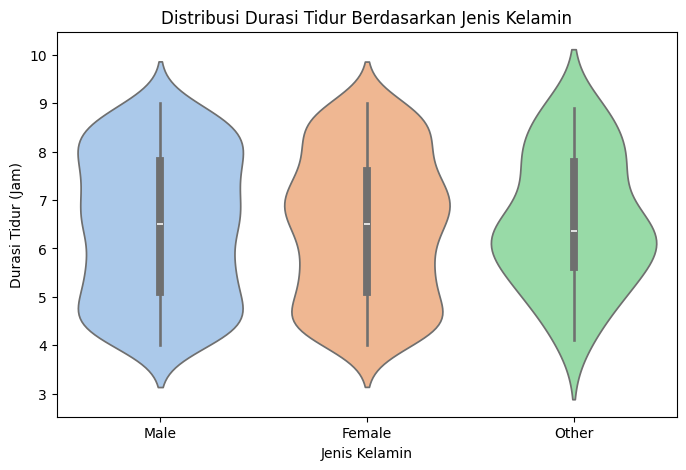

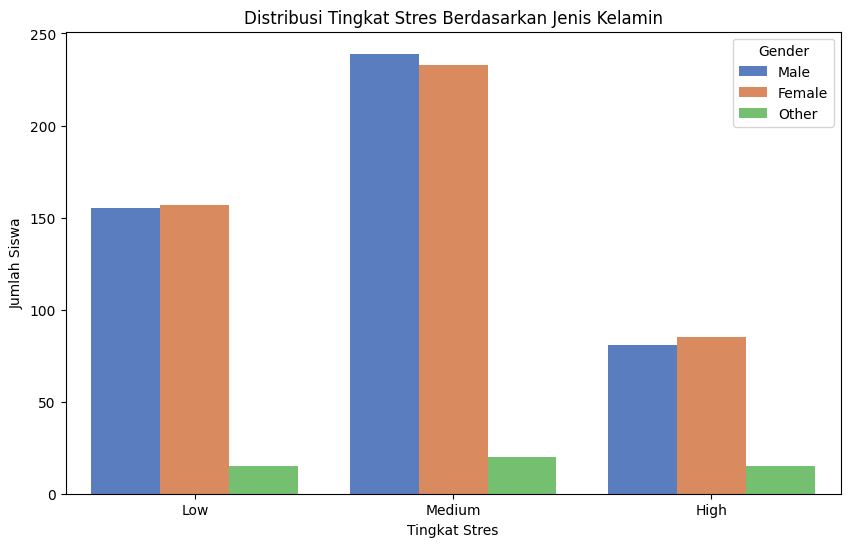

In [67]:

# Menggunakan Seaborn (Violin Plot untuk distribusi dan kepadatan)
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Gender', y='Sleep Duration (hrs)', palette='pastel')
plt.title('Distribusi Durasi Tidur Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Durasi Tidur (Jam)')
plt.show()

# Menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress Level', hue='Gender', order=stress_order, palette='muted')
plt.title('Distribusi Tingkat Stres Berdasarkan Jenis Kelamin')
plt.xlabel('Tingkat Stres')
plt.ylabel('Jumlah Siswa')
plt.show()